# Author: Tanmay Rathod

Data Science & Business Analytics Intern

Task 6 - Prediction Using Decision Tree Algorithm

GRIP- The Spark Foundation

The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings("ignore")

## Loading Data

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring Data

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#Dropping Unneccessary Column
data = data.drop(["Id"], axis = "columns") 
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Visualization

### Scatter Plot 

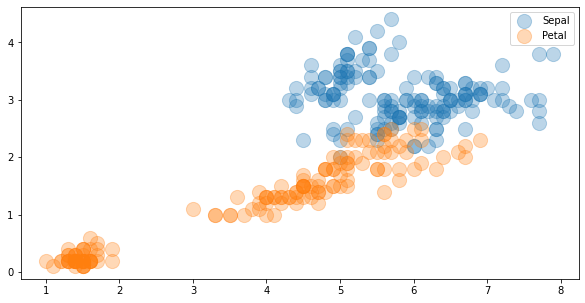

In [6]:
rng = np.random.RandomState(0)
plt.figure(figsize = (10,5))
x1 = "Length(cm)"
y1 = "Width(cm)"
plt.scatter(data["SepalLengthCm"],data["SepalWidthCm"], label = "Sepal",alpha =0.3,s = 200)
plt.scatter(data["PetalLengthCm"],data["PetalWidthCm"],label ="Petal",alpha = 0.3,s =200)
plt.legend()

### Distplot of the dataset

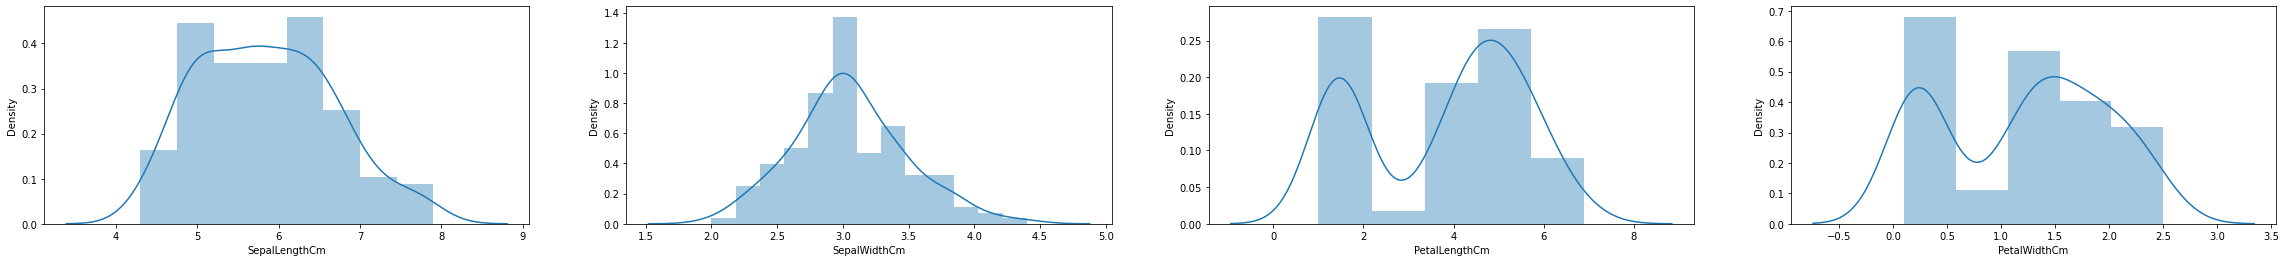

In [7]:
fig,ax=plt.subplots(nrows=1,ncols =4)
sns.distplot(data["SepalLengthCm"],ax=ax[0])
sns.distplot(data["SepalWidthCm"],ax=ax[1])
sns.distplot(data["PetalLengthCm"],ax=ax[2])
sns.distplot(data["PetalWidthCm"],ax=ax[3])
fig.set_figwidth(40)

### Heatmap of Data 

It is done to check the correlation between the variables.

<AxesSubplot:>

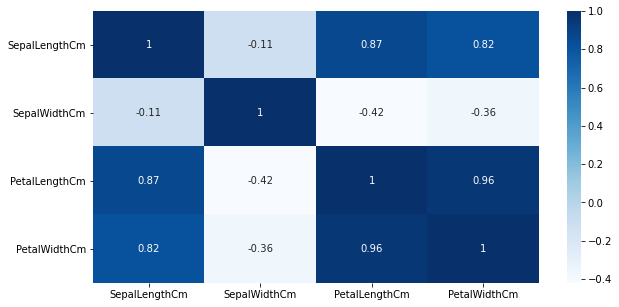

In [8]:
plt.figure(figsize= (10,5))
sns.heatmap(np.round(data.corr(),2),annot= True,cmap='Blues')

### Pair Plot of the Data

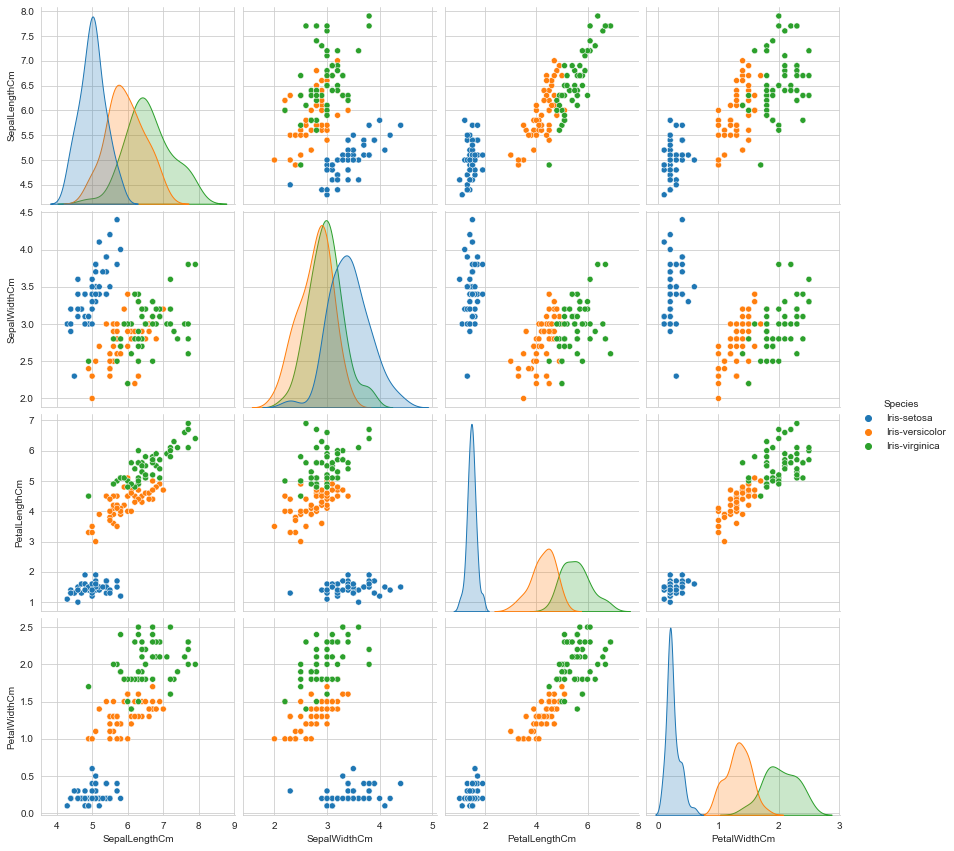

In [9]:
sns.set_style('whitegrid')
sns.pairplot(data,hue='Species',size = 3)

1. There is seems positve correlation between petal-length and petal-width(seems linear relationship).
2. Iris-setosa seems to have smaller petal length and petal width as compared to others.
3. Iris-setosa seems to also have smaller sepal length and sepal width as compared to others.
4. It seems like petal- length and petal-width are right-skewed.

## Data Preprocessing

In [10]:
x = data.iloc[:,0:4].values
y =data['Species'].values

print(x.shape)
print(y.shape)

(150, 4)
(150,)


### Splitting Training and Testing Data

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 82)

### Lets check our training and testing data

In [12]:
x_train

array([[5. , 3.5, 1.3, 0.3],
       [7.6, 3. , 6.6, 2.1],
       [5.1, 3.5, 1.4, 0.2],
       [6. , 3. , 4.8, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [4.8, 3.1, 1.6, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.7, 2.8, 4.5, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6. , 2.7, 5.1, 1.6],
       [6.4, 2.8, 5.6, 2.2],
       [6.3, 2.8, 5.1, 1.5],
       [5.1, 3.3, 1.7, 0.5],
       [7.7, 3.8, 6.7, 2.2],
       [4.9, 2.5, 4.5, 1.7],
       [5.6, 2.7, 4.2, 1.3],
       [6.5, 3. , 5.8, 2.2],
       [5.7, 2.6, 3.5, 1. ],
       [6.1, 3. , 4.6, 1.4],
       [5. , 2. , 3.5, 1. ],
       [7.7, 2.6, 6.9, 2.3],
       [4.8, 3.4, 1.6, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.4, 2.9, 4.3, 1.3],
       [4.5, 2.3, 1.3, 0.3],
       [5.6, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [7.4, 2

In [13]:
x_test

array([[6.7, 3.3, 5.7, 2.1],
       [5.8, 2.8, 5.1, 2.4],
       [5.2, 4.1, 1.5, 0.1],
       [4.7, 3.2, 1.3, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3. , 4.2, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.5, 4.9, 1.5],
       [6.6, 2.9, 4.6, 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [5.1, 3.8, 1.9, 0.4],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.8, 3. , 5.5, 2.1],
       [7. , 3.2, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [5.5, 2.5, 4. , 1.3],
       [5. , 3.2, 1.2, 0.2],
       [6.7, 3.3, 5.7, 2.5],
       [5.7, 3.8, 1.7, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [6.1, 2.9, 4.7, 1.4],
       [6.4, 2.8, 5.6, 2.1],
       [4.6, 3.2, 1.4, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [5.8, 2.7, 3.9, 1.2]])

In [14]:
y_train

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-vers

In [15]:
y_test

array(['Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

## Decision Tree Classifier

### Fitting the Model

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree =DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred =dtree.predict(x_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


### Evaluating the model

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm =confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy of our model is ' + str(round(accuracy,2))+'%.') 

[[11  0  0]
 [ 0  8  1]
 [ 0  2  8]]
Accuracy of our model is 90.0%.


### Cross Validating

In [18]:
from sklearn.model_selection import cross_val_score
cv_accuracy = cross_val_score(dtree,x_train,y_train,cv =5)
print(cv_accuracy)
print("Accuracy of Model with Cross Validation is "+ str(round(cv_accuracy.mean() * 100)) +'%.')

[0.875      1.         1.         0.95833333 0.91666667]
Accuracy of Model with Cross Validation is 95.0%.


## Decision Tree Visualization

### Textual Visualization

In [19]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



### Graphical Visualization

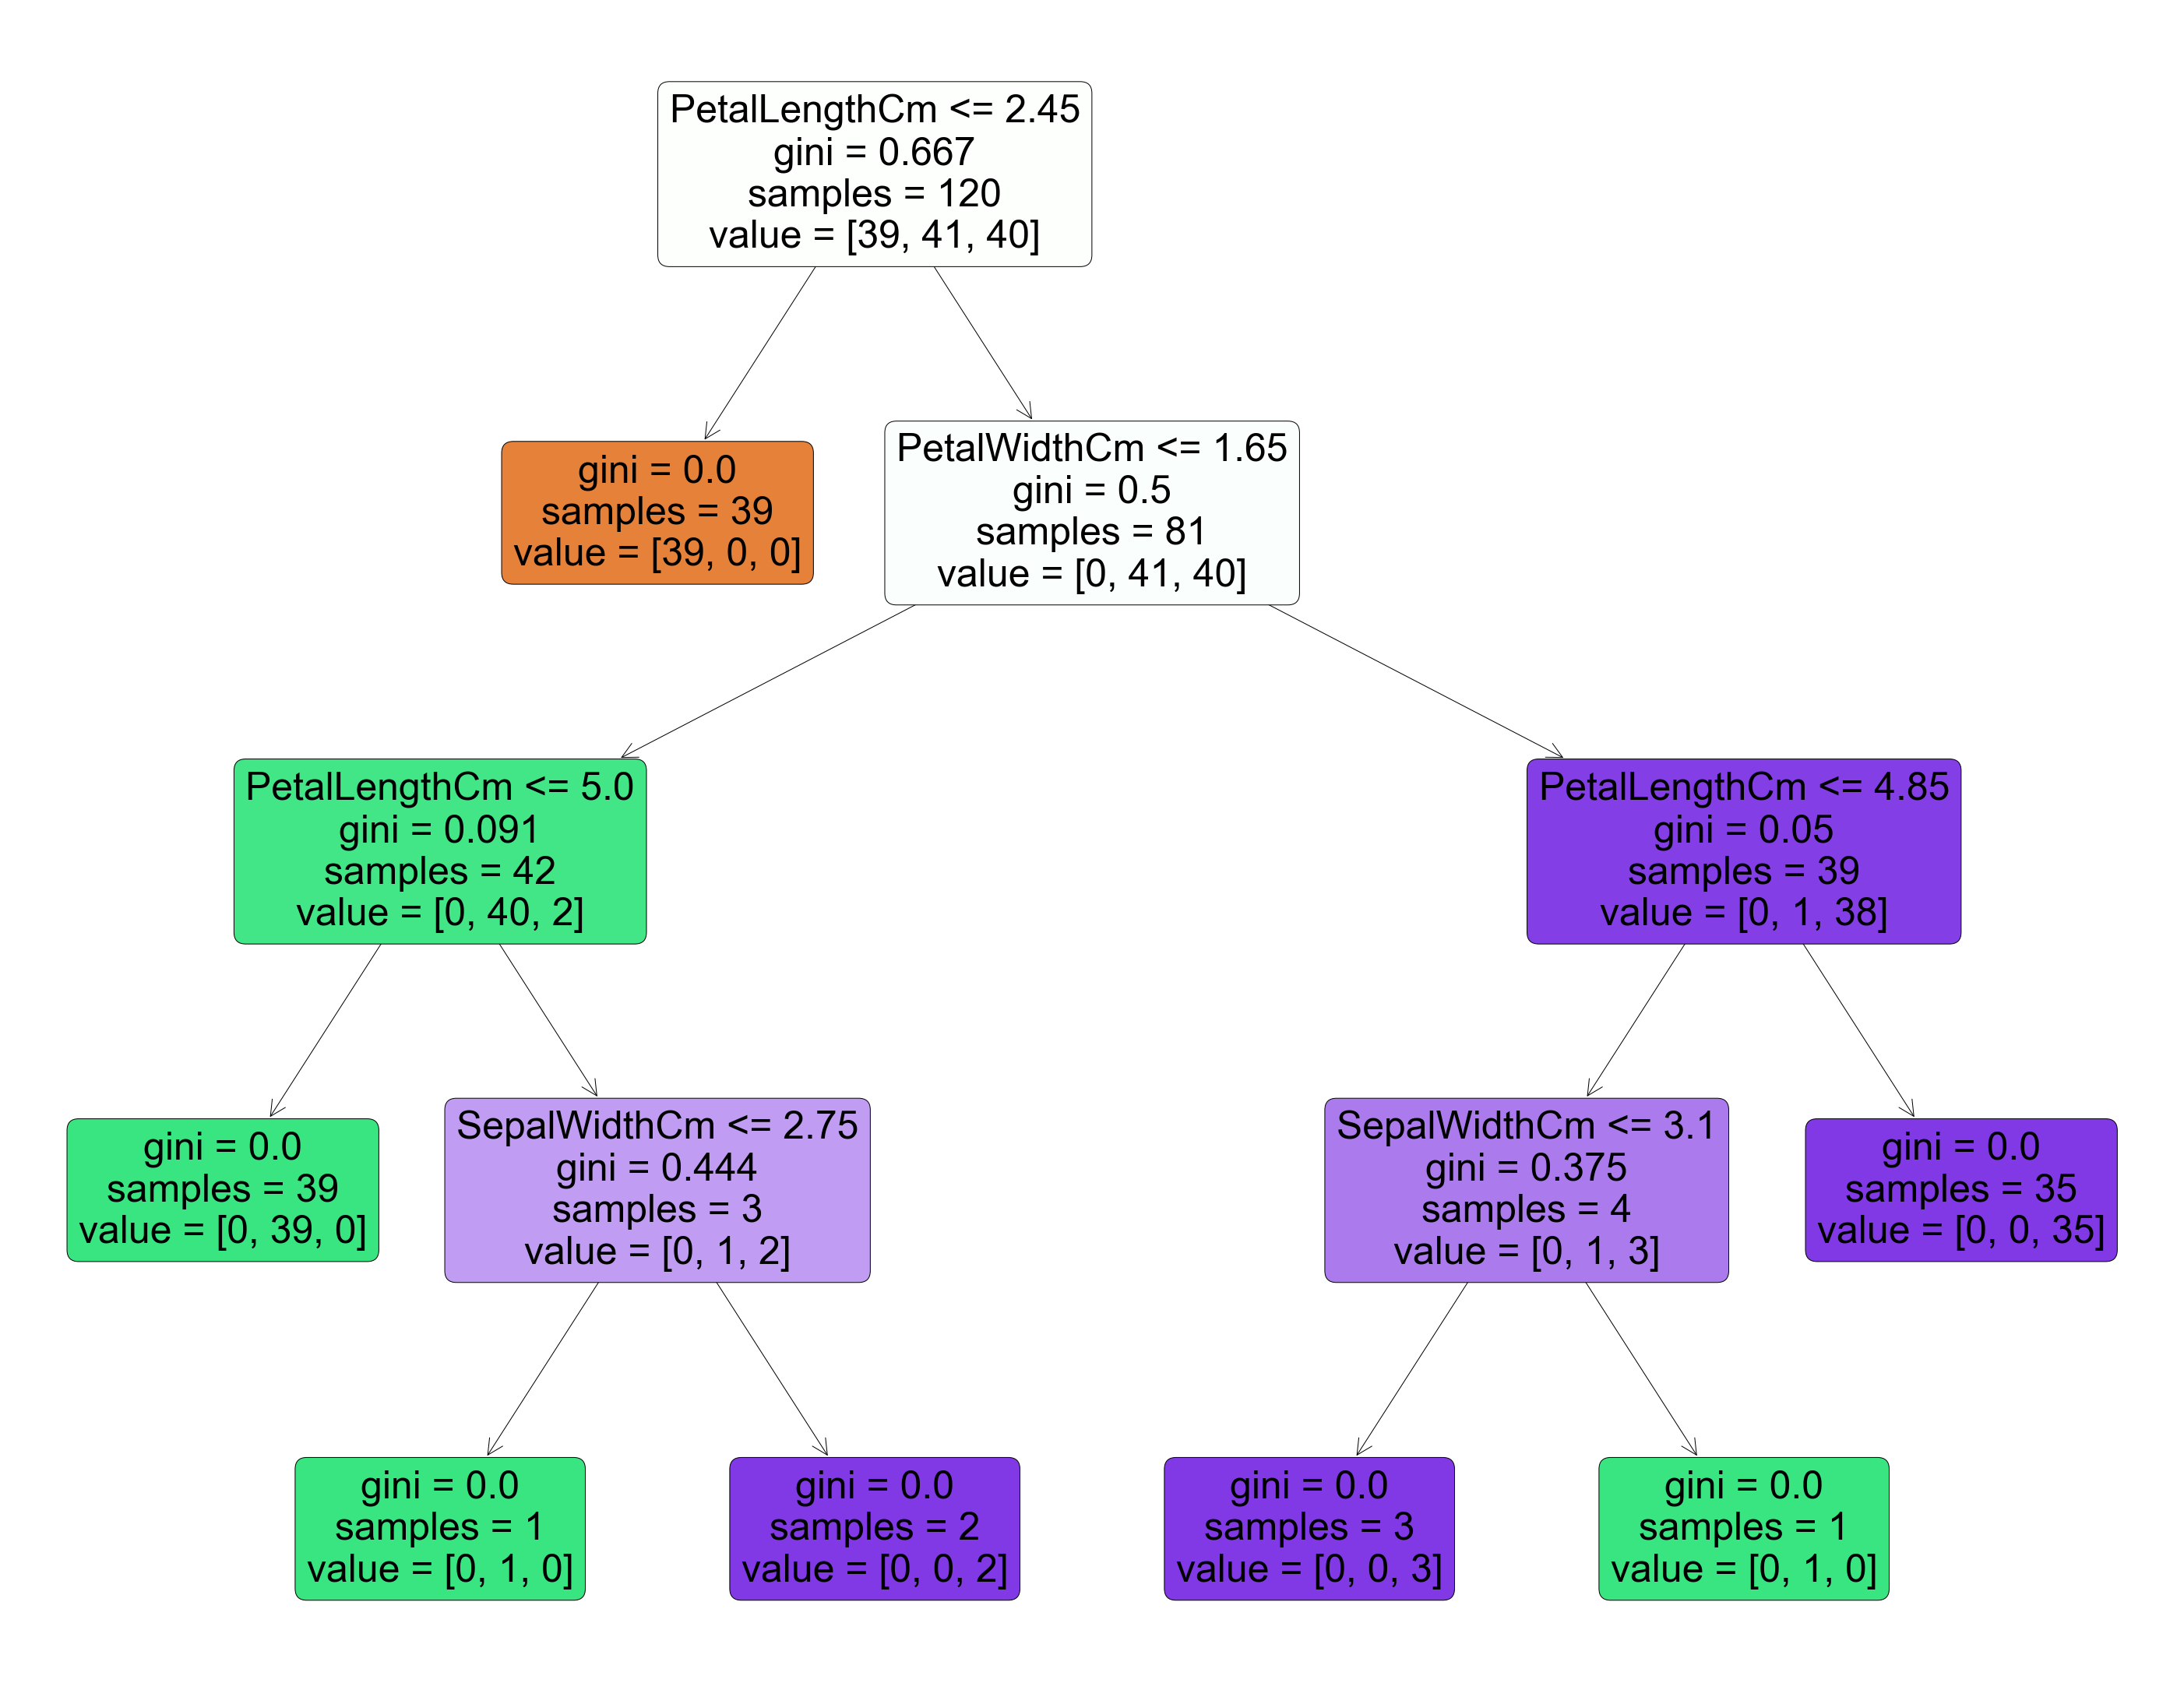

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize =(50,40))
plt.style.use("grayscale")
plot_tree(dtree,rounded= True,filled =True, feature_names =data.columns)
plt.show()

### Now lets check if our model is able to predict by giving a random data

In [21]:
new = [[5.1,3.5,1.4,0.2]]
pred =dtree.predict(new)
print(pred)

['Iris-setosa']


Our model is working properly.

# Conclusion:

1.The Accuracy of our model is 90.0%.

2.The Accuracy of our model with cross validation is 95.0%.